In [2]:
# 載入需要的套件
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 讀取資料檔
app_train = pd.read_csv(r"C:\Users\QQ\Desktop\training data\application_train.csv")
app_train.shape

(307511, 122)

In [3]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':#兩種物件轉換成0,1
        if len(list(app_train[col].unique())) <= 2:
            #  如果只有兩種值的類別型欄位就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col]) 
            #fit_transform()的作用就是先訓練，找到轉換資料的規則，然後根據找到的規則轉換資料。           
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

print(app_train["DAYS_EMPLOYED"].head(20))

0     -637.0
1    -1188.0
2     -225.0
3    -3039.0
4    -3038.0
5    -1588.0
6    -3130.0
7     -449.0
8        NaN
9    -2019.0
10    -679.0
11       NaN
12   -2717.0
13   -3028.0
14    -203.0
15   -1157.0
16   -1317.0
17    -191.0
18   -7804.0
19   -2038.0
Name: DAYS_EMPLOYED, dtype: float64


In [24]:
# 仿照 Day 17 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
# 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

# **將年齡相關資料, 另外存成一個 DataFrame 來處理 **
age_data = app_train[['TARGET', 'DAYS_BIRTH']]
age_data['DAYS_BIRTH_yr']=age_data['DAYS_BIRTH']/365
age_data['DAYS_BIRTH_yr']=pd.cut(age_data['DAYS_BIRTH_yr'],bins = np.linspace(20, 70, num = 11))
age_data["DAYS_BIRTH_yr"].value_counts() 

C:\Users\QQ\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\QQ\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


(35.0, 40.0]    42868
(40.0, 45.0]    41406
(30.0, 35.0]    39440
(45.0, 50.0]    35135
(50.0, 55.0]    34942
(55.0, 60.0]    33120
(25.0, 30.0]    32862
(60.0, 65.0]    27476
(20.0, 25.0]    12159
(65.0, 70.0]     8103
Name: DAYS_BIRTH_yr, dtype: int64

In [58]:
# 依照組別彙整年齡資料 "每一欄的平均值"
age_groups = age_data.groupby('DAYS_BIRTH_yr').mean() #groupby():以DAYS_BIRTH_yr來分類再做平均

#print出range(len(age_groups.index))給你看!
print(range(len(age_groups.index)))
age_groups

range(0, 10)


,TARGET,DAYS_BIRTH
DAYS_BIRTH_yr,,
"(20.0, 25.0]",0.123036,8532.795625
"(25.0, 30.0]",0.111436,10155.219250
"(30.0, 35.0]",0.102814,11854.848377
"(35.0, 40.0]",0.089414,13707.908253
"(40.0, 45.0]",0.078491,15497.661233
"(45.0, 50.0]",0.074171,17323.900441
"(50.0, 55.0]",0.066968,19196.494791
"(55.0, 60.0]",0.055314,20984.262742
"(60.0, 65.0]",0.052737,22780.547460


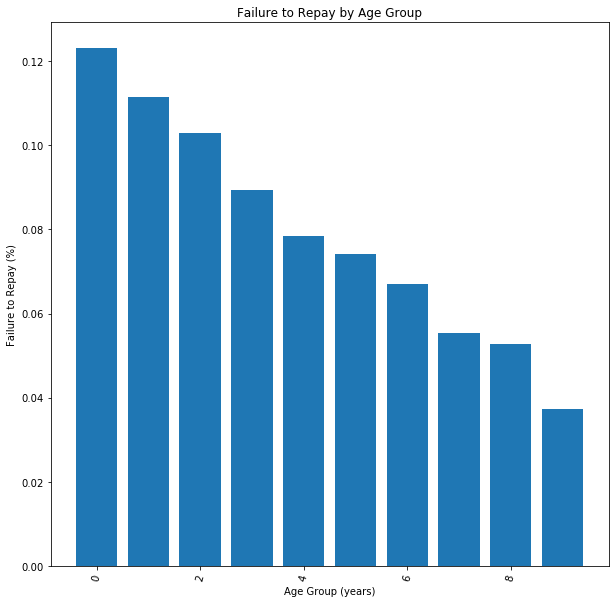

In [57]:
#畫圖(重要)
plt.figure(figsize = (10,10))#調整圖的大小

# 以年齡區間為 x, target 為 y 繪製 barplot
plt.bar(range(len(age_groups.index)), age_groups['TARGET'])#age_groups.index就是age_groups的最左邊那欄(索引)
plt.xticks(rotation = 75) ; plt.xlabel('Age Group (years)') ; plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');
#*plt.xticks(rotation = 75)旋轉x軸刻度，不會擠在一起*


TypeError: float() argument must be a string or a number, not 'pandas._libs.interval.Interval'

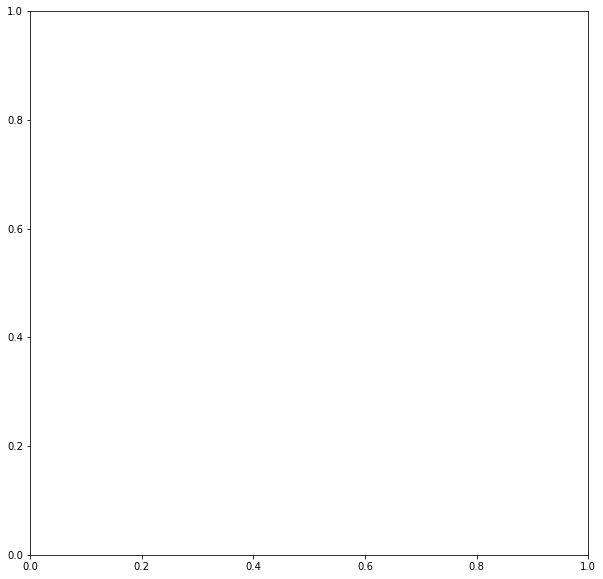

In [50]:
plt.figure(figsize = (10,10))#調整圖的大小

# 以年齡區間為 x, target 為 y 繪製 barplot
plt.bar(age_groups.index, age_groups['TARGET'])#age_groups.index就是age_groups的最左邊那欄(索引)

# 用法!!!  plt.xticks(x, labels, rotation='vertical') 
plt.xticks(range(len(age_groups.index)),age_groups.index,rotation = 'vertical')
; plt.xlabel('Age Group (years)') ; plt.ylabel('Failure to Repay (%)')

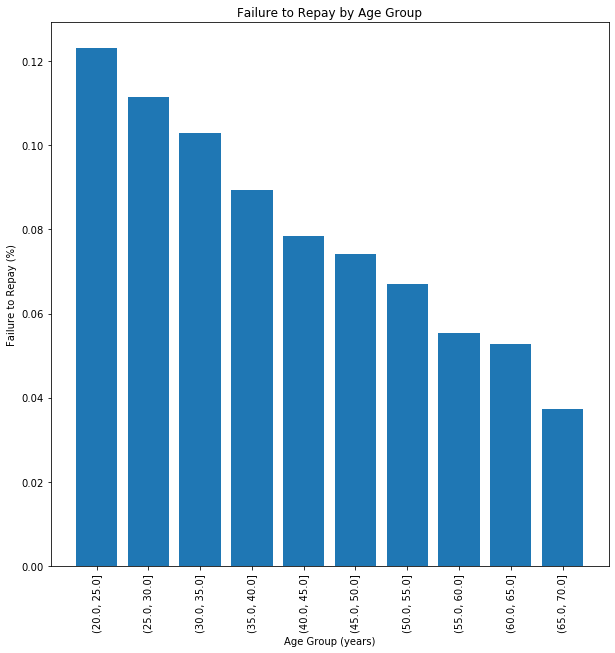

In [53]:
#畫圖(重要)
plt.figure(figsize = (10,10))#調整圖的大小

# 以年齡區間為 x, target 為 y 繪製 barplot
plt.bar(range(len(age_groups.index)), age_groups['TARGET'])#age_groups.index就是age_groups的最左邊那欄(索引)

# 重要用法!!!  plt.xticks(x, labels, rotation='vertical') #

plt.xticks(range(len(age_groups.index)),age_groups.index,rotation = 'vertical'); plt.xlabel('Age Group (years)') ; plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');
#plt.xticks(rotation ='vertical' )旋轉x軸刻度為垂直，不會擠在一起

In [40]:
theBeatles = ['John Lennon', 'Paul McCartney', 'Ringo Starr', 'George Harrison']
# for i in range(len(theBeatles)):
#     print(theBeatles[i])
# 利用 range() 函式，可以很方便的建立出一個整數序列
print(range(len(theBeatles)))#List中第 0,1,2,3筆資料

range(0, 4)
